# Coding a simple decision tree with mean and 80/20 ratio
***

This notebook was developed from an initial template given by **Code Canteen** and data scientist Lila Rose. They can be reach at http://futurecoders.org.uk/. The initial work was based on using medians as indicators and a train/test ratio of 80/20.<br>

In the following notebooks, we will use different ratios and different indicators, to see how the decision trees change (or not). For the complete explanations, please refer to the notebook *Decision-Tree-coded-model-Median-80-20*.

Author of the final document: Ester Giménez Mojón.

In this worksheet we are going to code a decision tree, which will use the calculated probabilities to make decisions about wheter a row of given data would be classified as `Iris virginica`, `Iris setosa` or `Iris versicolor`, or not, based on sepal and petal dimensions. With this information, species would be further predicted by probabilities of error.

This notebook will provide a decision tree for every one of the three different types of Iris considered. Each tree will be independent of each other.

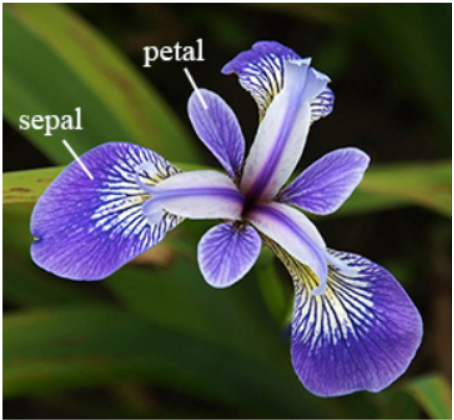

The splitting will be used later, to see if the remaining data (the test set) relates very well with the train set.<br>

In order to manage decision trees, we need to decide which item we will use as a discriminator for separating values above and below it. We can use the median, the mean, quartiles (25 or 75), etc. In this case, I will use the means.<br>

We will use:<br>

- mean instead of median as indicator.<br>
- train/test percentages as 80/20.

### 1. READ THE IRIS DATASET
***

Like with the previous notebook, we will use the same iris dataset, located at https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data.<br>

The columns in the CSV file do not have headings, so we need to add them:<br>

> url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"<br>
> names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']<br>
> iris_data = pd.read_csv(url, name=names)<br>

There are 150 rows of data, no empty spaces.<br>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
iris_data.mean()

C:\Users\Anaconda\anaconda3\envs\mapas\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal-length    5.843333
sepal-width     3.054000
petal-length    3.758667
petal-width     1.198667
dtype: float64

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. SPLIT THE DATA INTO TRAIN AND TEST DATASETS
***

In [4]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from all columns
train, test = train_test_split(iris_data, test_size=0.20, random_state=2)
# random_state fixes the results of the calculation every time that the whole notebook is run, otherwise it will show
# different results, due to the random test_size, as it will choose different items every time.
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,120.000000,120.000000,120.000000,120.000000
mean,5.897500,3.055833,3.862500,1.243333
std,0.813382,0.443401,1.741344,0.753115
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.450000,1.400000
75%,6.400000,3.325000,5.100000,1.825000
max,7.900000,4.400000,6.900000,2.500000


### 3. ASSUMPTIONS
***

Same as in the previous notebook, we will only use the data we have on the 3 species as a representation of the species.

In [5]:
sl_indicator = iris_data['sepal-length'].mean()
sw_indicator = iris_data['sepal-width'].mean()
pl_indicator = iris_data['petal-length'].mean()
pw_indicator = iris_data['petal-width'].mean()

print(sl_indicator, sw_indicator, pl_indicator, pw_indicator)
display(train.describe())

5.843333333333334 3.0540000000000003 3.758666666666666 1.1986666666666668


,sepal-length,sepal-width,petal-length,petal-width
count,120.000000,120.000000,120.000000,120.000000
mean,5.897500,3.055833,3.862500,1.243333
std,0.813382,0.443401,1.741344,0.753115
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.450000,1.400000
75%,6.400000,3.325000,5.100000,1.825000
max,7.900000,4.400000,6.900000,2.500000


The means change slightly because it is not the same to calculate the averages of the whole set than the means of the train set.<br>

- means of the whole set: 5.843, 3.054, 3.7587, 1.198<br>
- means after split: 5.897, 3.056, 3.862, 1.243

### 4. PROPORTION OF VALUES ON or ABOVE AND BELOW THE INDICATOR
***

This calculates the probability of elements in a specified column, that are:<br>

- **above** the mean in relation to the total number of elements in that column.<br>
- **below** the mean in relation to the total number of elements of the column.<br>

This will be used to calculate the Gini Index of the above and the below values.

__SEPAL LENGHT__

In [6]:
# Calculate the proportion of values in sepal-length column that are on or above the median
sl_vi_above_indicator = train[train['sepal-length'] >= sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
sl_vi_below_indicator = train[train['sepal-length'] < sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
print(sl_vi_above_indicator)
print(sl_vi_below_indicator)

0.48333333333333334
0.5166666666666667


__SEPAL WIDTH__

In [7]:
# Calculate the proportion of values in sepal-width column that are on or above the median

sw_indicator_vi_above = train[train['sepal-width'] >= sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
sw_indicator_vi_below = train[train['sepal-width'] < sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
print(sw_indicator_vi_above)
print(sw_indicator_vi_below)

0.44166666666666665
0.5583333333333333


__PETAL LENGHT__

In [8]:
# Calculate the proportion of values in petal-length column that are on or above the median
pl_vi_above_indicator = train[train['petal-length'] >= pl_indicator]['petal-length'].count() / train['petal-length'].count()
pl_vi_below_indicator = train[train['petal-length'] < pl_indicator]['petal-length'].count() / train['petal-length'].count()
print(pl_vi_above_indicator)
print(pl_vi_below_indicator)

0.6416666666666667
0.35833333333333334


__PETAL WIDTH__

In [9]:
# Calculate the proportion of values in petal-width column that are on or above the median
pw_vi_above_indicator = train[train['petal-width'] >= pw_indicator]['petal-width'].count() / train['petal-width'].count()
pw_vi_below_indicator = train[train['petal-width'] < pw_indicator]['petal-width'].count() / train['petal-width'].count()
print(pw_vi_above_indicator)
print(pw_vi_below_indicator)

0.6166666666666667
0.38333333333333336


The results are as follow:

|MEANS|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|-----|------------|-----------|------------|-----------|
|xx_vi_above_indicator|0.4833|0.4416|0.6416|0.6166|
|xx_vi_below_indicator|0.5166|0.5583|0.3583|0.3833|

### 5 - CALCULATION OF THE PROPORTION OF VALUES (CONDITIONED PROBABILITY) ON OR ABOVE THE INDICATOR THAT ARE OF A GIVEN SPECIES 

We will calculate the probability of a row being on or above the indicator and of a given species at the same time. <br>
The same will be done with the rows being under the indicator and of a given species at the same time.<br>
The calculations will be done for every column as well.<br>

The steps would be, for example:<br>

- Filter by values in the sepal-length column that are on or above the mean (sl_indicator) and the species column being `Iris-virginica`.<br>
- Filter by values in the sepal-length column that are on or above the mean (sl_indicator) only.<br>
- Divide both results.

Instead of filtering the columns again and repeating the steps above to know which numbers are ON or ABOVE the indicator and NOT of one of the given species, we will do a substraction:<br>

> = 1 - (the proportion of those that are `Iris virginica`)

### 5.1 - On or above the indicator and `Iris virginica` 

In [10]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-virginica
sl_vi_above = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above, sw_vi_above, pl_vi_above, pw_vi_above)

0.6379310344827587 0.2641509433962264 0.5454545454545454 0.5675675675675675


In [11]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-virginica

no_sl_vi_above = 1 - sl_vi_above
no_sw_vi_above = 1 - sw_vi_above
no_pl_vi_above = 1 - pl_vi_above
no_pw_vi_above = 1 - pw_vi_above

print(no_sl_vi_above, no_sw_vi_above, no_pl_vi_above, no_pw_vi_above)

0.3620689655172413 0.7358490566037736 0.4545454545454546 0.43243243243243246


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris v.|0.6379|0.264|0.5454|0.5676|
|above not Iris v.|0.3621|0.7358|0.4545|0.4324|


### 5.2 - On or above the indicator and `Iris setosa`

In [12]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-setosa
sl_vi_above_cet = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_cet = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_cet = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_cet = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_cet, sw_vi_above_cet, pl_vi_above_cet, pw_vi_above_cet)

0.0 0.6037735849056604 0.0 0.0


In [13]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-setosa

no_sl_vi_above_cet = 1 - sl_vi_above_cet
no_sw_vi_above_cet = 1 - sw_vi_above_cet
no_pl_vi_above_cet = 1 - pl_vi_above_cet
no_pw_vi_above_cet = 1 - pw_vi_above_cet

print(no_sl_vi_above_cet, no_sw_vi_above_cet, no_pl_vi_above_cet, no_pw_vi_above_cet)

1.0 0.39622641509433965 1.0 1.0


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris s.|0.0|0.6038|0.0|0.0|
|above not Iris s.|1.0|0.396|1.0|1.0|

### 5.3 - On or above the indicator and `Iris versicolor`

In [14]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-versicolor
sl_vi_above_ver = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_ver = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_ver = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_ver = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_ver, sw_vi_above_ver, pl_vi_above_ver, pw_vi_above_ver)

0.3620689655172414 0.1320754716981132 0.45454545454545453 0.43243243243243246


In [15]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-versicolor

no_sl_vi_above_ver = 1 - sl_vi_above_ver
no_sw_vi_above_ver = 1 - sw_vi_above_ver
no_pl_vi_above_ver = 1 - pl_vi_above_ver
no_pw_vi_above_ver= 1 - pw_vi_above_ver

print(no_sl_vi_above_ver, no_sw_vi_above_ver, no_pl_vi_above_ver, no_pw_vi_above_ver)

0.6379310344827587 0.8679245283018868 0.5454545454545454 0.5675675675675675


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris s.|0.36207|0.13207|0.4545|0.4324|
|above not Iris s.|0.6379|0.8679|0.5454|0.56756|

### 6 - CALCULATION OF THE PROPORTION OF VALUES (CONDITIONED PROBABILITY) BELOW THE INDICATOR THAT ARE OF A GIVEN SPECIES

Same as section 5 but below the indicator.

### 6.1 - Below mean and `Iris virginica`

In [16]:
# calculate the proportion of results where the value is below median that are of the species Iris-virginica

sl_vi_below = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below = (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below, sw_vi_below, pl_vi_below, pw_vi_below)

0.08064516129032258 0.417910447761194 0.0 0.0


In [17]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-virginica

no_sl_vi_below = 1-sl_vi_below
no_sw_vi_below = 1-sw_vi_below
no_pl_vi_below = 1-pl_vi_below
no_pw_vi_below = 1-pw_vi_below

print(no_sl_vi_below, no_sw_vi_below, no_pl_vi_below, no_pw_vi_below)

0.9193548387096774 0.582089552238806 1.0 1.0


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris v.|0.0806|0.4179|0.0|0.0|
|below not Iris v.|0.91935|0.5821|1.0|1.0|

### 6.2 - Below mean and `Iris setosa`

In [18]:
# calculate the proportion of results where the value is below median that are of the species Iris-setosa

sl_vi_below_set = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_set= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_set = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_set = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below_set, sw_vi_below_set, pl_vi_below_set, pw_vi_below_set)

0.5806451612903226 0.05970149253731343 0.8372093023255814 0.782608695652174


In [19]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-setosa

no_sl_vi_below_set = 1-sl_vi_below_set
no_sw_vi_below_set = 1-sw_vi_below_set
no_pl_vi_below_set = 1-pl_vi_below_set
no_pw_vi_below_set = 1-pw_vi_below_set

print(no_sl_vi_below_set, no_sw_vi_below_set, no_pl_vi_below_set, no_pw_vi_below_set)

0.4193548387096774 0.9402985074626866 0.16279069767441856 0.21739130434782605


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris s.|0.5806|0.0.597|0.8372|0.7826|
|below not Iris s.|0.4193|0.9403|0.1628|0.2174|

### 6.3 Below mean and `Iris versicolor`

In [20]:
# calculate the proportion of results where the value is below median that are of the species Iris-versicolor

sl_vi_below_ver = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_ver= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_ver = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_ver = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below_ver, sw_vi_below_ver, pl_vi_below_ver, pw_vi_below_ver)

0.3387096774193548 0.5223880597014925 0.16279069767441862 0.21739130434782608


In [21]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-versicolor

no_sl_vi_below_ver = 1-sl_vi_below_ver
no_sw_vi_below_ver = 1-sw_vi_below_ver
no_pl_vi_below_ver = 1-pl_vi_below_ver
no_pw_vi_below_ver = 1-pw_vi_below_ver

print(no_sl_vi_below_ver, no_sw_vi_below_ver, no_pl_vi_below_ver, no_pw_vi_below_ver)

0.6612903225806452 0.4776119402985075 0.8372093023255813 0.782608695652174


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris ver.|0.3387|0.5224|0.1628|0.2174|
|below not Iris ver.|0.6613|0.4776|0.8372|0.7826|

### 7 - Calculate Gini Index of the above and below parts, by species (not of the column).

Each time you split the data set into train and test, you will get a slightly 
different mix and so your train data set will be slightly different. We are 
going to try to look at how well we might predict a particular species from 
the 3 columns. Let's use the `Iris-virginica` species and try to predict if a 
row would be that species or not, based on the four dimensions columns.
<br>

A Gini Index is a measure of the probability of a randomly chosen prediction 
being incorrect. The most influential column will have the lowest Gini Index 
and that will be put at the top of our decision tree. <br>

The formula for the Gini Index is: <br>
<br>
Gini Index = 1 - (the sum of the squares of the proportion values calculated above) <br>
<br>
To calculate the Gini Index for, use the following example: <br>
<br>
gini_sl_vi = 1 - (sl_vi_above2 + no_sl_vi_above2)<br>

### 7.1 Gini Index of `Iris virginica` <br>

In [22]:
# calculate the Gini Index for the proportion of those above median which are Iris_virginica, for all four columns

gini_sl_vi_above = 1 - (sl_vi_above**2 + no_sl_vi_above**2)
gini_sw_vi_above = 1 - (sw_vi_above**2 + no_sw_vi_above**2)
gini_pl_vi_above = 1 - (pl_vi_above**2 + no_pl_vi_above**2)
gini_pw_vi_above = 1 - (pw_vi_above**2 + no_pw_vi_above**2)

print(gini_sl_vi_above, gini_sw_vi_above, gini_pl_vi_above, gini_pw_vi_above)

0.461950059453032 0.38875044499822 0.49586776859504134 0.49086924762600437


In [23]:
# calculate the Gini Index for the proportion of those below median which are Iris_virginica, for all four columns

gini_sl_vi_below = 1 - (sl_vi_below**2 + no_sl_vi_below**2)
gini_sw_vi_below = 1 - (sw_vi_below**2 + no_sw_vi_below**2)
gini_pl_vi_below = 1 - (pl_vi_below**2 + no_pl_vi_below**2)
gini_pw_vi_below = 1 - (pw_vi_below**2 + no_pw_vi_below**2)

print(gini_sl_vi_below, gini_sw_vi_below, gini_pl_vi_below, gini_pw_vi_below)

0.148283038501561 0.48652261082646464 0.0 0.0


The results for `Iris Virginica` are as follow:

|Gini Index I.virg|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|-----------------|------------|-----------|------------|-----------|
|above|0.4619|0.3887|0.4958|0.4908|
|below|0.1483|0.4865|0.0|0.0|

### 7.2 Gini Index of `Iris setosa` <br>

In [24]:
# calculate the Gini Index for the proportion of those above median which are Iris_setosa, for all four columns

gini_sl_vi_above_cet = 1 - (sl_vi_above_cet**2 + no_sl_vi_above_cet**2)
gini_sw_vi_above_cet = 1 - (sw_vi_above_cet**2 + no_sw_vi_above_cet**2)
gini_pl_vi_above_cet = 1 - (pl_vi_above_cet**2 + no_pl_vi_above_cet**2)
gini_pw_vi_above_cet = 1 - (pw_vi_above_cet**2 + no_pw_vi_above_cet**2)

print(gini_sl_vi_above_cet, gini_sw_vi_above_cet, gini_pl_vi_above_cet, gini_pw_vi_above_cet)

0.0 0.4784620861516554 0.0 0.0


In [25]:
# calculate the Gini Index for the proportion of those below median which are Iris_setosa, for all four columns

gini_sl_vi_below_set = 1 - (sl_vi_below_set**2 + no_sl_vi_below_set**2)
gini_sw_vi_below_set = 1 - (sw_vi_below_set**2 + no_sw_vi_below_set**2)
gini_pl_vi_below_set = 1 - (pl_vi_below_set**2 + no_pl_vi_below_set**2)
gini_pw_vi_below_set = 1 - (pw_vi_below_set**2 + no_pw_vi_below_set**2)

print(gini_sl_vi_below_set, gini_sw_vi_below_set, gini_pl_vi_below_set, gini_pw_vi_below_set)

0.48699271592091575 0.11227444865226088 0.2725797728501893 0.3402646502835538


The results for `Iris setosa` are as follow:

|Gini Index I.setosa|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|-------------------|------------|-----------|------------|-----------|
|above|0.0|0.4784|0.0|0.0|
|below|0.4867|0.1123|0.2726|0.3403|

### 7.3 Gini Index of `Iris versicolor` <br>

In [26]:
# calculate the Gini Index for the proportion of those above median which are Iris_versicolor, for all four columns

gini_sl_vi_above_ver = 1 - (sl_vi_above_ver**2 + no_sl_vi_above_ver**2)
gini_sw_vi_above_ver = 1 - (sw_vi_above_ver**2 + no_sw_vi_above_ver**2)
gini_pl_vi_above_ver = 1 - (pl_vi_above_ver**2 + no_pl_vi_above_ver**2)
gini_pw_vi_above_ver = 1 - (pw_vi_above_ver**2 + no_pw_vi_above_ver**2)

print(gini_sl_vi_above_ver, gini_sw_vi_above_ver, gini_pl_vi_above_ver, gini_pw_vi_above_ver)

0.461950059453032 0.22926308294766806 0.49586776859504145 0.49086924762600437


In [27]:
# calculate the Gini Index for the proportion of those below median which are Iris_versicolor, for all four columns

gini_sl_vi_below_ver = 1 - (sl_vi_below_ver**2 + no_sl_vi_below_ver**2)
gini_sw_vi_below_ver = 1 - (sw_vi_below_ver**2 + no_sw_vi_below_ver**2)
gini_pl_vi_below_ver = 1 - (pl_vi_below_ver**2 + no_pl_vi_below_ver**2)
gini_pw_vi_below_ver = 1 - (pw_vi_below_ver**2 + no_pw_vi_below_ver**2)

print(gini_sl_vi_below_ver, gini_sw_vi_below_ver, gini_pl_vi_below_ver, gini_pw_vi_below_ver)

0.4479708636836628 0.4989975495656048 0.2725797728501893 0.3402646502835538


The results for `Iris versicolor` are as follow:

|Gini Index I.vers|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|-----------------|------------|-----------|------------|-----------|
|above|0.4619|0.2296|0.4958|0.4908|
|below|0.4479|0.4989|0.2726|0.3403|

### 8 - Add weights to the index

### 8.1 - Gini Index of `Iris virginica`

In [28]:
# Calculate the weighted Gini Index for sepal-lenght
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above + sl_vi_below_indicator * gini_sl_vi_below
print(weighted_gini_sl_vi)

0.29988876529477204


In [29]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above + sw_indicator_vi_below * gini_sw_vi_below
print(weighted_gini_sw_vi)

0.4433399042523233


In [30]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above + pl_vi_below_indicator * gini_pl_vi_below
print(weighted_gini_pl_vi)

0.31818181818181823


In [31]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above + pw_vi_below_indicator * gini_pw_vi_below
print(weighted_gini_pw_vi)

0.3027027027027027


The results for `Iris virginica` are as follow:

|Total Gini Index I.vir|Results|
|----------------------|-------|
|SEPAL LENGTH|0.2998|
|SEPAL WIDTH|0.4466|
|PETAL LENGTH|0.3181|
|PETAL WIDTH|0.3027|

### 8.2 - Gini Index of `Iris setosa`

In [32]:
# calculate the proportion of values in sepal-length column that are on or above mean, then calculate the weighted Gini Index
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_cet + sl_vi_below_indicator * gini_sl_vi_below_set
print(weighted_gini_sl_vi)

0.2516129032258065


In [33]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above_cet + sw_indicator_vi_below * gini_sw_vi_below_set
print(weighted_gini_sw_vi)

0.2740073218811601


In [34]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.09767441860465118


In [35]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_cet + pw_vi_below_indicator * gini_pw_vi_below_set
print(weighted_gini_pw_vi)

0.13043478260869562


The results for `Iris setosa` are as follow:

|Total Gini Index I.set|Results|
|----------------------|-------|
|SEPAL LENGTH|0.2516|
|SEPAL WIDTH|0.274|
|PETAL LENGTH|0.0977|
|PETAL WIDTH|0.1304|

### 8.3 - Gini Index of `Iris versicolor`

In [36]:
# calculate the proportion of values in sepal-length column that are on or above mean, then calculate the weighted Gini Index
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_ver + sl_vi_below_indicator * gini_sl_vi_below_ver
print(weighted_gini_sl_vi)

0.4547274749721913


In [37]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above_ver + sw_indicator_vi_below * gini_sw_vi_below_ver
print(weighted_gini_sw_vi)

0.3798648268093494


In [38]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.09767441860465118


In [39]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_ver + pw_vi_below_indicator * gini_pw_vi_below_ver
print(weighted_gini_pw_vi)

0.43313748531139834


The results for `Iris versicolor` are as follow:

|Total Gini Index I.ver|Results|
|----------------------|-------|
|SEPAL LENGTH|0.4547|
|SEPAL WIDTH|0.3798|
|PETAL LENGTH|0.0976|
|PETAL WIDTH|0.4331|

### 9 - MAKE A DECISION TREE

### 9.1 `Iris virginica`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Total Gini Index I.vir|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|----------------------|------------|-----------|------------|-----------|
|Results|0.2998|0.4466|0.3181|0.3027|

The order of the nodes is:

1. Sepal length
2. Petal width
3. Petal length
4. Sepal width

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris v.|0.6379|0.264|0.5454|0.5676|
|above not Iris v.|0.3621|0.7358|0.4545|0.4324|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris v.|0.0806|0.4179|0.0|0.0|
|below not Iris v.|0.91935|0.5821|1.0|1.0|

**First node**: sepal length has 91.9 of the occurrenes below and not of the species, which means that they are **above** the indicator (64% in fact).I will put the species in the above split.

**Second node**: petal width has 0% occurrences of `Iris virginica` below the indicator, so they must be **above**.

**Third node**: petal length same as with petal width, all occurrences are **above** the indicator.

**Fourth node**: sepal width has 73.6% probability of being above and not of the species, so it must be **below** with a 42%.

The decision tree is a little bit different regarding the order of the characteristics with using the median indicator:

















































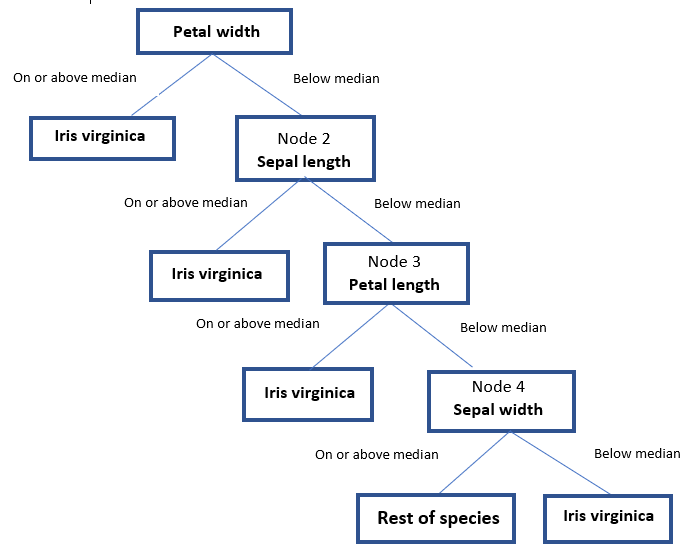

### 9.2 `Iris setosa`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Total Gini Index I.vir|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|----------------------|------------|-----------|------------|-----------|
|Results|0.2516|0.274|0.0977|0.1304|

The order of the nodes is:

1. Petal length
2. Petal width
3. Sepal length
4. Sepal width

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris s.|0.0|0.6038|0.0|0.0|
|above not Iris s.|1.0|0.396|1.0|1.0

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris s.|0.5806|0.0.597|0.8372|0.7826|
|below not Iris s.|0.4193|0.9403|0.1628|0.2174|

**First node**: petal length has 0% occurrences of `Iris setosa` being above the indicator, so they must be **below**.<br>
**Second node**: petal width has 0% occurrences of `Iris setosa` being above the indicator, so they must be **below**.<br>
**Third node**: sepal length has 0% occurrences of `Iris setosa` being above the indicator, so they must be **below**.<br>
**Fourth node**: sepal width has 94% probability of being below the indicator and not `Iris setosa`, so they must be **above**.

This decision tree follows the same splits as with the median indicator:

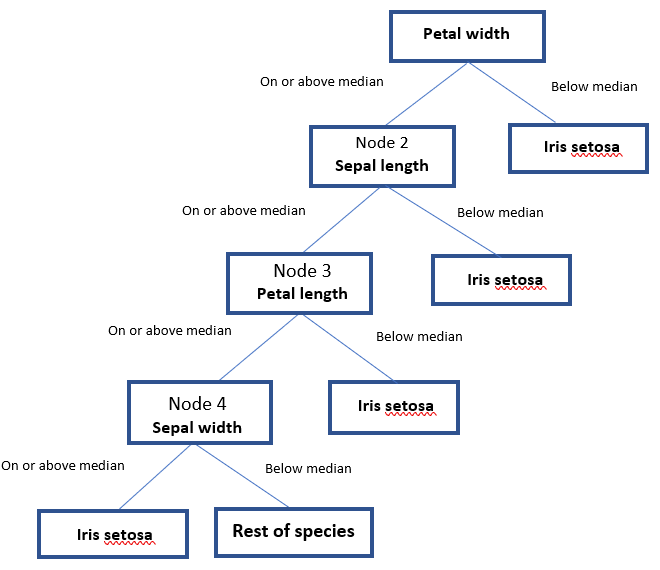

### 9.3 `Iris versicolor`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Total Gini Index I.ver|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|----------------------|------------|-----------|------------|-----------|
|Results|0.4547|0.3798|0.0976|0.4331|

The order of the nodes is:

1. Petal length
2. Sepal width
3. Petal width
4. Sepal length

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris s.|0.36207|0.13207|0.4545|0.4324|
|above not Iris s.|0.6379|0.8679|0.5454|0.56756|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris ver.|0.3387|0.5224|0.1628|0.2174|
|below not Iris ver.|0.6613|0.4776|0.8372|0.7826|

**First node**: petal length has 83.7% occurrences of no `Iris versicolor` and below the indicator, so they must be **above**.<br>
**Second node**: sepal width has 86.7% occurrences of no `Iris versicolor` being above the indicator, so they must be **below**. 
<br>
**Third node**: petal width has 78% probability of being not below the indicator and not `Iris versicolor`, so they must be **above**.<br>
**Fourth node**: sepal length has 66% occurrences of no `Iris versicolor` and below the indicator, but 64% of above and not of the species. These two percentages are so similar that it is not possible to split the indicator. I can choose **above** just because 66 > 64, but it is not significative.

The first two nodes follow the splits of the median and the mean 70/30, however the two last nodes are different (their weights are very similar, 0.43 for petal width and 0.45 for sepal length, that it is not significative to use them in this decision tree. <br>
I have added them here as a matter of completeness with regards to previous decision trees and splits.

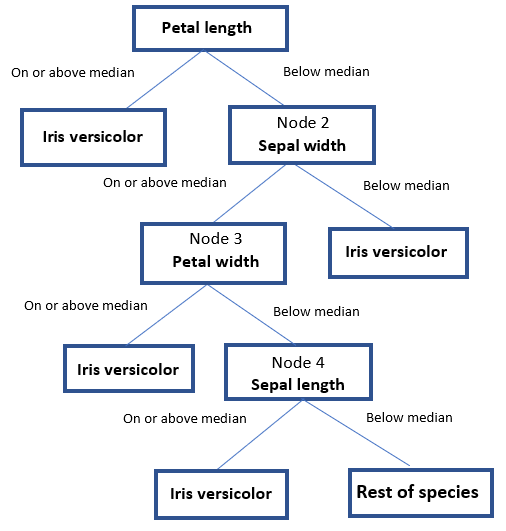

### 10 - EFFICIENCY OF THE DECISION TREES

#### 10.1 Test efficiency of the decision tree for `Iris virginica`

In [45]:
def predict_species(df):
    if df['petal-width'] >= pw_indicator:
        if df['sepal-length'] >= sl_indicator:
            if df['petal-length'] >= pl_indicator:
                #if df['sepal-width'] <= sw_indicator:
                #    return "Iris-virginica"
                #else:
                #    return None
                return "Iris-virginica"
            else:
                return None
            #return "Iris-virginica"
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.23333333333333334


The efficiency of classification of 'Iris virginica' is 23.4% if we consider the first 3 nodes. Including the fourth node, the efficiency decreases to 13.4%.

The last node should not be used for classification purposes.

#### 10.2 Test efficiency of the decision tree for `Iris setosa`

In [41]:
def predict_species(df):
    if df['petal-length'] <= pl_indicator:
        if df['petal-width'] <= pw_indicator:
            #if df['sepal-length'] <= sl_indicator:
                #if df['sepal-width'] >= sw_indicator:
                #    return "Iris-setosa"
                #else:
                #    return None
            #    return "Iris-setosa"
            #else:
            #    return None
            return "Iris-setosa"
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size)

Proportion correctly identified 0.4666666666666667


The efficiency of classification of 'Iris setosa' is 33.4% when all nodes are included. With the first 3 nodes, the efficiency increases to 46.7%.

#### 10.3 Test efficiency of the decision tree for `Iris versicolor`.

In [42]:
def predict_species(df):
    if df['petal-length'] >= pl_indicator:
        if df['sepal-width'] <= sw_indicator:
            #if df['petal-width'] >= sl_indicator:
                #if df['sepal-length'] >= pw_indicator:
                #    return "Iris-versicolor"
                #else:
                #    return None
             #   return "Iris-versicolor"
            #return None
            return "Iris-versicolor"
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.23333333333333334


The efficiency of classification of 'Iris versicolor' is 0% with 3 or 4 nodes. With 2 nodes, it classifies 23.4%.

### 11 - PLOT GRAPHS

For the petals we have:

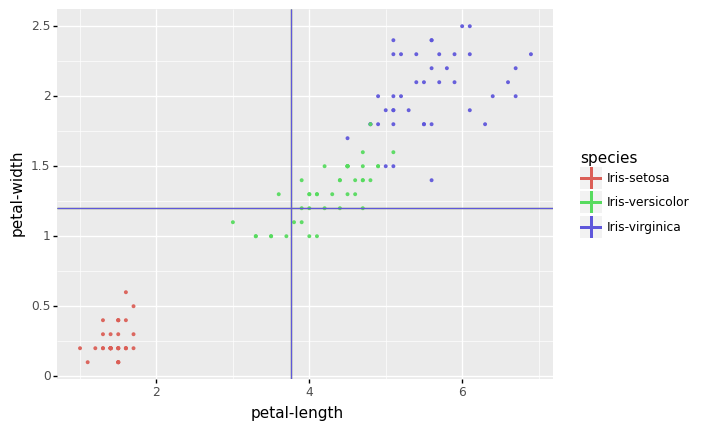

<ggplot: (-9223371953648956724)>

In [43]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=pl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=pw_indicator, color='species'))
)

For the sepals we have:

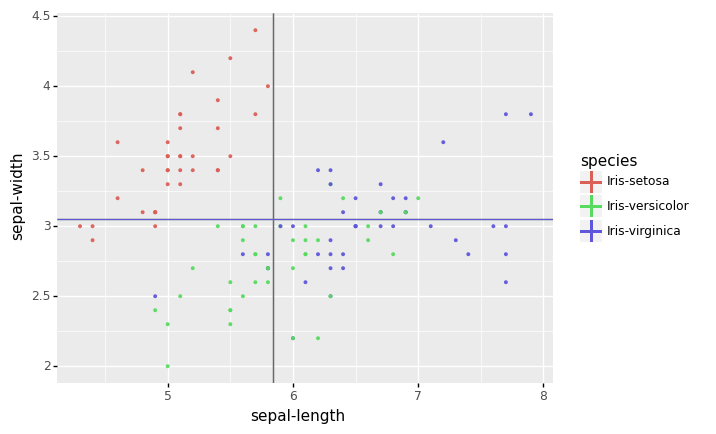

<ggplot: (-9223371953654588028)>

In [44]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='sepal-length', y='sepal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=sl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=sw_indicator, color='species'))
)

### CONCLUSION

The decision trees are the same except `IRis versicolor`. While the decision tree with the indicators median (both 80/20 and 70/30) and mean 70/30, the order of the classifiers is petal lenght - sepal width - sepal length - petal width, in this case is petal length - sepal width - petal width - sepal length. It is good to remember that the last two classifiers are not statistically significative, so this change in positions does not provide information towards the classification of the species (the efficiency with 4 or 3 nodes is 0%).<br>

The efficiency of the trees is better for `Iris setosa`, which arrives to 46.7% and `Iris versicolor`, which arrives to 23.4%.<br>

In conclusion, for the same decision trees and mean as indicator, it is better to use a split of 70/30 than 80/20, if we want to differentiate the 3 species. If we are only interested in differentiating 2 species (`setosa` and `virginica`), then 80/20 is better.